# CS 498 - Applied Machine Learning
## Homework 1
### Aaron Blythe
### Dan Barker

#### Page 1


| Setup | Cross-validation Accuracy |
|---|---|
| Unprocessed data | 74.16% |
| 0-value elements ignored | 72.14% |

\pagebreak

#### Page 2

The page should contain snippets of code demonstrating:

1. Calculation of distribution parameters

```python
def summarize(data, ignore_zeros=False):
  temp = pd.DataFrame(data)
  temp.columns = columns
  if ignore_zeros:
    temp[ignore].replace(0, np.nan)
  means = temp.groupby('Class', as_index=False).mean()
  stdevs = temp.groupby('Class', as_index=False).std() 
  return means, stdevs
```

2. Calculation of naive Bayes predictions

```python
def calculate_probabilities(row, means, stdevs, p_diabetes, ignore_zeros=False):
  diabetes = 1
  no_diabetes = 1
  for feature in features:
    if ignore_zeros and row[feature] == 0:
      continue
    
    diabetes += np.log(norm.pdf(row[feature], means.loc[means['Class'] == 0, feature].iloc[0], stdevs.loc[stdevs['Class'] == 0, feature].iloc[0]))
    no_diabetes += np.log(norm.pdf(row[feature], means.loc[means['Class'] == 1, feature].iloc[0], stdevs.loc[stdevs['Class'] == 1, feature].iloc[0]))
  
  diabetes += np.log(p_diabetes)
  no_diabetes += np.log(1-p_diabetes)
  
  if diabetes < no_diabetes:
    return 1
  else:
    return 0
```

3. Test-train split code

```python
def splitDataset(df):
  ndarray = df.values
  np.random.shuffle(ndarray)
  return np.split(ndarray, [round(len(df.index)*percent_to_test)])
```  
  
  \pagebreak
  
#### Page 3
  
  Part 2 MNIST Accuracies (20 points)

| x |  Method | Training Set Accuracy | Test Set Accuracy |
|---|---|---|---|
| 1 | Gaussian + untouched | 77.17 |  77.60 |
| 2 | Gaussian + stretched | 82.41|  83.48 | 
| 3 | Bernoulli + untouched | 83.885 |  84.38 |
| 4 | Bernoulli + stretched | 82.17 | 83.39 |
| 5 | 10 trees + 4 depth + untouched |73.88 | 73.91 |
| 6 | 10 trees + 4 depth + stretched | 71.74 | 72.92  |
| 7 | 10 trees + 16 depth + untouched | 79.56 | 80.17 |
| 8 | 10 trees + 16 depth + stretched | 75.25 | 76.14 |
| 9 | 30 trees + 4 depth + untouched | 99.56 | 94.78 |
| 10 | 30 trees + 4 depth + stretched | 99.51 | 94.82 |
| 11 | 30 trees + 16 depth + untouched | 99.78 | 96.28 |
| 12 | 30 trees + 16 depth + stretched | 99.74 | 96.23 |


  \pagebreak
  
#### Page 4
    
    

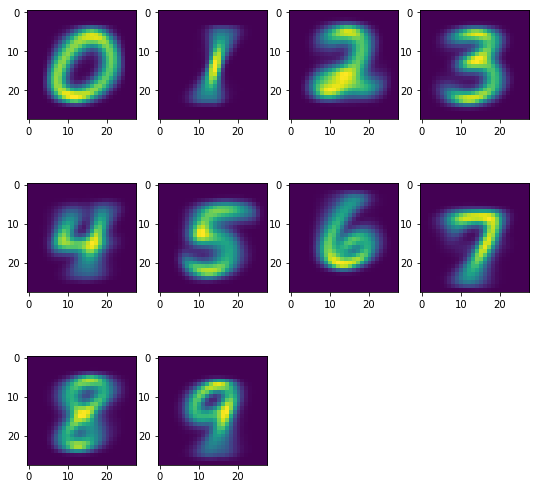

In [30]:
plt.figure(figsize=(9,9))
for i in range(10):
  plt.subplot(3,4, i+1)
  image = np.array(mean_pixel[i]).reshape(28,28)
  plt.imshow(image)
plt.show()

\pagebreak

#### Page 5

* Calculation of the Normal distribution parameters

```python
    mean = np.mean(this_class, axis=0)
    variance = np.var(this_class, axis=0)
    std = np.std(this_class, axis=0)
    log_py = np.log(p_y[0][class_num])
    temp = []
    for row in train:
      calc_pdf = np.nansum(norm.logpdf(row, mean, std)) + log_py
      temp.append(calc_pdf)
    p_train = np.array(temp)
    all_train = np.vstack((all_train, p_train))
```

* Calculation of the Bernoulli distribution parameters

```python
    mean = np.mean(this_class, axis=0)
    log_py = np.log(p_y[0][class_num])
    temp = []
    for row in train:
      sum_pdf = np.nansum(np.log(bernoulli.pmf(row, mean))) + log_py
      temp.append(sum_pdf)

```

* Calculation of the Naive Bayes predictions

```python
  p_train = np.array(temp)
  all_train = np.vstack((all_train, p_train.T))
  preds = []
  for single_pred in predictions:
    preds.append(np.argmax(all_train))
   accuracy = accuracy_score(target, preds)
```

* Training of a decision tree

```python
 random_forest_model = RandomForestClassifier(max_depth=d, random_state=0, n_estimators=n)
 random_forest_model.fit(train_x1, train_y1)

```

* Calculation of a decision tree predictions

```python
  prediction_train = random_forest_model.predict(train_x1)
  accuracy = accuracy_score(train_y1, prediction_train)
  print("Train " + case + ": " + str(accuracy * 100) + "% Accuracy")
 
  prediction = random_forest_model.predict(test_x1)
  accuracy = accuracy_score(test_y1, prediction)
  print("Test " + case + ": " + str(accuracy * 100) + "% Accuracy")

```

\pagebreak

Code for Problem #1

In [5]:
# ideas influenced by: https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import math
import pandas as pd 
import numpy as np
import time
from scipy.stats import norm

columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
features = [ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ignore = [ 'BloodPressure', 'SkinThickness', 'BMI', 'Age']
percent_to_test = 0.2

# https://scikit-learn.org/stable/modules/naive_bayes.html
def numpyControlRun(df):
  X_train, X_test = train_test_split(df, test_size=0.2, random_state=int(time.time()))
  gnb = GaussianNB()
  gnb.fit(
    X_train[features].values,
    X_train["Class"]
  )
  y_pred = gnb.predict(X_test[features])

  print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Class"] != y_pred).sum(),
          100*(1-(X_test["Class"] != y_pred).sum()/X_test.shape[0])
  ))

def splitDataset(df):
  ndarray = df.values
  np.random.shuffle(ndarray)
  return np.split(ndarray, [round(len(df.index)*percent_to_test)])

def summarize(data, ignore_zeros=False):
  temp = pd.DataFrame(data)
  temp.columns = columns
  if ignore_zeros:
    temp[ignore].replace(0, np.nan)
  means = temp.groupby('Class', as_index=False).mean()
  stdevs = temp.groupby('Class', as_index=False).std() # I've tried swapping in var here, but it didn't change anything
  return means, stdevs

def trainModel(train, ignore_zeros=False):
  return summarize(train, ignore_zeros)
  
def calculate_probabilities(row, means, stdevs, p_diabetes, ignore_zeros=False):
  diabetes = 1
  no_diabetes = 1
  for feature in features:
    if ignore_zeros and row[feature] == 0:
      continue
    
    diabetes += np.log(norm.pdf(row[feature], means.loc[means['Class'] == 0, feature].iloc[0], stdevs.loc[stdevs['Class'] == 0, feature].iloc[0]))
    no_diabetes += np.log(norm.pdf(row[feature], means.loc[means['Class'] == 1, feature].iloc[0], stdevs.loc[stdevs['Class'] == 1, feature].iloc[0]))
  
  diabetes += np.log(p_diabetes)
  no_diabetes += np.log(1-p_diabetes)
  
  if diabetes < no_diabetes:
    return 1
  else:
    return 0

def testModel(means, stdevs, p_diabetes, test, ignore_zeros=False):
  temp = pd.DataFrame(test, columns=columns)
  temp['predicted'] = temp.apply(calculate_probabilities, axis=1, means=means, stdevs=stdevs, p_diabetes=p_diabetes, ignore_zeros=ignore_zeros)
  return temp

def main():
  df = pd.read_csv("data/pima-indians-diabetes.csv", header=None)
  df.columns = columns
  p_diabetes = 1.0*len(df[df["Class"] == 1])/(len(df.index))
  numpyControlRun(df)
  total_correct = 0
  total_tested = 0

  for i in range(10):
    correct = 0
    test, train = splitDataset(df)
    means, stdevs = trainModel(train)
    results = testModel(means, stdevs, p_diabetes, test)
    for index, item in results.iterrows():
      if item['Class'] == item['predicted']:
        correct += 1
    print(correct/len(test))
    total_correct += correct
    total_tested += len(test)
  
  print("Total accuracy: {}".format(total_correct/total_tested))
  
  total_correct = 0
  total_tested = 0
  for i in range(10):
    correct = 0
    test, train = splitDataset(df)
    means, stdevs = trainModel(train, True)
    results = testModel(means, stdevs, p_diabetes, test, True)
    for index, item in results.iterrows():
      if item['Class'] == item['predicted']:
        correct += 1
    print(correct/len(test))
    total_correct += correct
    total_tested += len(test)
  
  print("Total accuracy ignoring zeros: {}".format(total_correct/total_tested))

main()

Number of mislabeled points out of a total 154 points : 35, performance 77.27%
0.7727272727272727
0.6688311688311688
0.7337662337662337
0.7207792207792207
0.7597402597402597
0.7272727272727273
0.6623376623376623
0.7272727272727273
0.7402597402597403
0.7012987012987013
Total accuracy: 0.7214285714285714
0.7467532467532467
0.7207792207792207
0.7337662337662337
0.7597402597402597
0.7467532467532467
0.7142857142857143
0.7337662337662337
0.7142857142857143
0.7402597402597403
0.7337662337662337
Total accuracy ignoring zeros: 0.7344155844155844


\pagebreak

Code for Problem #2

In [7]:
# Load the Drive helper and mount
#from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')
#!pip install python-mnist

# NOTE: you will have to get the 4 files:
# * t10k-images-idx3-ubyte.gz
# * t10k-labels-idx1-ubyte.gz
# * train-images-idx3-ubyte.gz
# * train-labels-idx1-ubyte.gz
# Then run this on each: gzip -d <file name> 
# Then put them into the folder: Colab Notebooks/data on your Drive
#!ls "/content/drive/My Drive/Colab Notebooks/data"

In [8]:
# required imports
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from mnist import MNIST
from scipy.stats import norm
from scipy.stats import bernoulli
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# debugging imports
import datetime
import timeit
import itertools
from sklearn.metrics import confusion_matrix

#baseline imports
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
# for orientation, here is the current working directory and contents
#import os
#print(os.getcwd())
#os.listdir("/content/drive/My Drive/Colab Notebooks/data")

In [9]:
mndata = MNIST('./data')
#mndata = MNIST('/content/drive/My Drive/Colab Notebooks/data')
# images - list of arrays 0 to 254 representing 28x28 pixel images
# labels - array of labels from 0 to 9
images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [10]:
# P(y) - Array from 0 to 9 of probability of each number (all close to 0.1)
labels = pd.Series(labels)
p_y = pd.DataFrame(labels.value_counts() / len(labels))
p_y = p_y.sort_index()

# Numpy Arrays of train and test labels
train_y = np.array(labels)
test_y = np.array(test_labels)

# list of center pixel
mean_pixel = []

In [11]:
# make the pixels either black or white (binary)
def threshhold(color):
  bw = (0, 1)[color > 128]
  return bw

In [12]:
def stretch(image):
  data = pd.DataFrame(image)
  data = data[(data.T != 0).any()]
  data = data.loc[:, (data != 0).any(axis=0)]
  img = data.values
  new_image = cv2.resize(img, (20, 20))
  ret = np.array(new_image)
  return ret

In [13]:
def gaussian(train, test):
  all_train = np.empty(shape=(0, 60000))
  all_test = np.empty(shape=(0, 10000))
  for class_num in range(10):
    print("Starting class_num: " + str(class_num) + " with probability: " + str(p_y[0][class_num]) + " at: " + str(datetime.datetime.now().time()))
    index = np.where(train_y == class_num)
    this_class = train[index]
    # Compute a mean image and variance for each class.
    mean = np.mean(this_class, axis=0)
    variance = np.var(this_class, axis=0)
    # could add smoothing (because straight zero will produce a bunch of NaN)
    # https://piazza.com/class/jqo7mhnnyiy698?cid=93
    std = np.std(this_class, axis=0) #+ 0.004
    # while we are here going to knock out the Visual
    mean_pixel.append(mean.flatten())

    log_py = np.log(p_y[0][class_num])
    temp = []
    for row in train:
      # calculate pdf for each pixel of the testing image for all classes.  
      calc_pdf = np.nansum(norm.logpdf(row, mean, std)) + log_py
      # Calculate the sum of logarithms of each pdf for all classes.
      temp.append(calc_pdf)
    p_train = np.array(temp)
    #print(p_train.view())
    all_train = np.vstack((all_train, p_train))
 
    temp = []
    for row in test:
      calc_pdf = np.nansum(np.log(norm.pdf(row, mean, std))) + log_py
      temp.append(calc_pdf)
    p_test = np.array(temp)
    all_test = np.vstack((all_test, p_test))

  all_train = all_train.T
  all_test = all_test.T
  return all_train, all_test

In [14]:
# has not be named exactly bernoulli because will collide with object for pmf function
def bernoulli_func(train, test):
  all_train = np.empty(shape=(0, 60000))
  all_test = np.empty(shape=(0, 10000))
  for class_num in range(10):
    print("Starting class_num: " + str(class_num) + " with probability: " + str(p_y[0][class_num]) + " at: " + str(datetime.datetime.now().time()))
    index = np.where(train_y == class_num)
    this_class = train[index]
    mean = np.mean(this_class, axis=0) 

    log_py = np.log(p_y[0][class_num])
    temp = []
    for row in train: 
      sum_pdf = np.nansum(np.log(bernoulli.pmf(row, mean))) + log_py
      temp.append(sum_pdf)
    p_train = np.array(temp)
    all_train = np.vstack((all_train, p_train.T))

    temp = []
    for row in test:
      sum_pdf = np.nansum(np.log(bernoulli.pmf(row, mean))) + log_py
      temp.append(sum_pdf)
    p_test = np.array(temp)
    all_test = np.vstack((all_test, p_test.T))
  all_train = all_train.T
  all_test = all_test.T
  return all_train, all_test

In [15]:
def random_forest(d, n, train_x1, train_y1, test_x1, test_y1, case):
  random_forest_model = RandomForestClassifier(max_depth=d, random_state=0, n_estimators=n)
  random_forest_model.fit(train_x1, train_y1)

  # Seems odd to run against train data here...
  prediction_train = random_forest_model.predict(train_x1)
  accuracy = accuracy_score(train_y1, prediction_train)
  print("Train " + case + ": " + str(accuracy * 100) + "% Accuracy")
  
  prediction = random_forest_model.predict(test_x1)
  accuracy = accuracy_score(test_y1, prediction)
  print("Test " + case + ": " + str(accuracy * 100) + "% Accuracy")


In [16]:
def preprocess(images, do_stretch):
  data = []
  i = 0
  for img in images:
    newimg = np.array(img, dtype='uint8')
    newimg = newimg.reshape((28, 28))
    vfunc = np.vectorize(threshhold)
    newimg = vfunc(newimg)
    newimg = np.array(newimg, dtype='uint8')
    if do_stretch:
      newimg = stretch(newimg)
    newimg = newimg.flatten()
    #if i < 3:
    #  print(newimg)
    i += 1   
    data.append(newimg)
  data = np.array(data)
  print("i = " + str(i))
  return data

In [17]:
def accuracy(predictions, target, case):
  # Making predictions
  preds = []
  for single_pred in predictions:
    preds.append(np.argmax(single_pred))
    
  cf_matrix = confusion_matrix(target, preds)
  print(cf_matrix)
  
  accuracy = accuracy_score(target, preds)
  print(case + ": " + str(accuracy * 100) + "% Accuracy")

In [18]:
#Pre-Process the untouched images

print("Untouched train-preprocess start: " + str(datetime.datetime.now().time()))
train = preprocess(images, False)
print("Untouched test-preprocess start: " + str(datetime.datetime.now().time()))
test = preprocess(test_images, False)

print("Stretched train-preprocess start: " + str(datetime.datetime.now().time()))
stretched_train = preprocess(images, True)
print("Stretched test-preprocess start: " + str(datetime.datetime.now().time()))
stretched_test = preprocess(test_images, True)
print("Stretched test-preprocess finished: " + str(datetime.datetime.now().time()))

Untouched train-preprocess start: 22:26:16.127390


/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  This is separate from the ipykernel package so we can avoid doing imports until


i = 60000
Untouched test-preprocess start: 22:26:29.345647
i = 10000
Stretched train-preprocess start: 22:26:31.603587
i = 60000
Stretched test-preprocess start: 22:28:28.315062
i = 10000
Stretched test-preprocess finished: 22:28:48.579873


In [28]:
# reset mean_pixel
mean_pixel = []

print("Untouched Gaussian")
print("Gaussian start: " + str(datetime.datetime.now().time()))
all_train, all_test = gaussian(train, test)
print("Gaussian end: " + str(datetime.datetime.now().time()))
accuracy(all_train, train_y, "Training Set")
accuracy(all_test, test_y, "Test Set")

Untouched Gaussian
Gaussian start: 12:04:37.051030
Starting class_num: 0 with probability: 0.09871666666666666 at: 12:04:37.053007


/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1694: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1694: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x 

Starting class_num: 1 with probability: 0.11236666666666667 at: 12:04:49.709248
Starting class_num: 2 with probability: 0.0993 at: 12:05:02.012068
Starting class_num: 3 with probability: 0.10218333333333333 at: 12:05:13.910786
Starting class_num: 4 with probability: 0.09736666666666667 at: 12:05:25.870483
Starting class_num: 5 with probability: 0.09035 at: 12:05:38.650220
Starting class_num: 6 with probability: 0.09863333333333334 at: 12:05:50.672006
Starting class_num: 7 with probability: 0.10441666666666667 at: 12:06:02.331288
Starting class_num: 8 with probability: 0.09751666666666667 at: 12:06:13.305522
Starting class_num: 9 with probability: 0.09915 at: 12:06:25.023121
Gaussian end: 12:06:37.474670
[[4699    7  312    9   73  710   86    2   22    3]
 [   0 6273  143   22   32  176   27   17   28   24]
 [  34   67 5283  117  114  112  148   19   54   10]
 [  22  157  818 3972  132  669   47  119   40  155]
 [  12   16  206   13 5029  227   73   46   18  202]
 [  76   65  174  214 

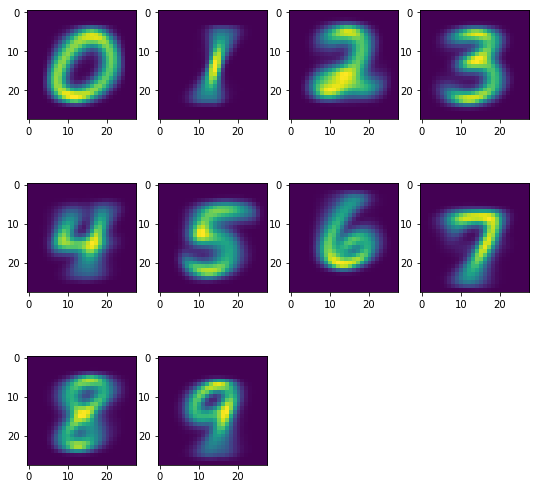

In [29]:
plt.figure(figsize=(9,9))
for i in range(10):
  plt.subplot(3,4, i+1)
  image = np.array(mean_pixel[i]).reshape(28,28)
  plt.imshow(image)
plt.show()

In [21]:
print("Stretched Gaussian")
print("Gaussian start: " + str(datetime.datetime.now().time()))
all_train, all_test = gaussian(stretched_train, stretched_test)
print("Gaussian end: " + str(datetime.datetime.now().time()))
accuracy(all_train, train_y, "Training Set")
accuracy(all_test, test_y, "Test Set")

Stretched Gaussian
Gaussian start: 22:34:35.477630
Starting class_num: 0 with probability: 0.09871666666666666 at: 22:34:35.477811
Starting class_num: 1 with probability: 0.11236666666666667 at: 22:34:44.064886
Starting class_num: 2 with probability: 0.0993 at: 22:34:52.782063
Starting class_num: 3 with probability: 0.10218333333333333 at: 22:35:01.002004
Starting class_num: 4 with probability: 0.09736666666666667 at: 22:35:09.836430
Starting class_num: 5 with probability: 0.09035 at: 22:35:18.280963
Starting class_num: 6 with probability: 0.09863333333333334 at: 22:35:26.509272
Starting class_num: 7 with probability: 0.10441666666666667 at: 22:35:35.011597
Starting class_num: 8 with probability: 0.09751666666666667 at: 22:35:43.354872
Starting class_num: 9 with probability: 0.09915 at: 22:35:51.700036
Gaussian end: 22:35:58.841462
[[5504   86   20   12   78   14   60    1  128   20]
 [   1 5284  261   46  284   70   91  406  191  108]
 [  46  101 5011   49   49   68  126  189  264   5

In [22]:
print("Untouched Bernoulli")
mean_pixel = []
print("Bernoulli start: " + str(datetime.datetime.now().time()))
all_train, all_test = bernoulli_func(train, test)
print("Bernoulli finish: " + str(datetime.datetime.now().time()))
accuracy(all_train, train_y, "Training Set")
accuracy(all_test, test_y, "Test Set")

Untouched Bernoulli
Bernoulli start: 22:35:59.187928
Starting class_num: 0 with probability: 0.09871666666666666 at: 22:35:59.188062


/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/ablythe/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Starting class_num: 1 with probability: 0.11236666666666667 at: 22:36:18.054855
Starting class_num: 2 with probability: 0.0993 at: 22:36:35.136934
Starting class_num: 3 with probability: 0.10218333333333333 at: 22:36:53.473372
Starting class_num: 4 with probability: 0.09736666666666667 at: 22:37:11.521136
Starting class_num: 5 with probability: 0.09035 at: 22:37:29.718723
Starting class_num: 6 with probability: 0.09863333333333334 at: 22:37:46.955348
Starting class_num: 7 with probability: 0.10441666666666667 at: 22:38:05.080581
Starting class_num: 8 with probability: 0.09751666666666667 at: 22:38:23.455614
Starting class_num: 9 with probability: 0.09915 at: 22:38:41.276459
Bernoulli finish: 22:38:59.046839
[[5288    1   37   24   16  261  138    1  145   12]
 [   0 6408   44   16    3   81   22    5  155    8]
 [  74  109 4908  184  117   23  208   57  256   22]
 [  39  129  253 4954   14  185   53   57  276  171]
 [  15   46   35    0 4676   22   89   18  113  828]
 [ 117   59   52  

In [23]:
print("Stretched Bernoulli")
print("Bernoulli start: " + str(datetime.datetime.now().time()))
all_train, all_test = bernoulli_func(stretched_train, stretched_test)
print("Bernoulli finish: " + str(datetime.datetime.now().time()))
accuracy(all_train, train_y, "Training Set")
accuracy(all_test, test_y, "Test Set")

Stretched Bernoulli
Bernoulli start: 22:38:59.412263
Starting class_num: 0 with probability: 0.09871666666666666 at: 22:38:59.412393
Starting class_num: 1 with probability: 0.11236666666666667 at: 22:39:12.826946
Starting class_num: 2 with probability: 0.0993 at: 22:39:25.012363
Starting class_num: 3 with probability: 0.10218333333333333 at: 22:39:38.903414
Starting class_num: 4 with probability: 0.09736666666666667 at: 22:39:51.723313
Starting class_num: 5 with probability: 0.09035 at: 22:40:05.031172
Starting class_num: 6 with probability: 0.09863333333333334 at: 22:40:17.483428
Starting class_num: 7 with probability: 0.10441666666666667 at: 22:40:30.388795
Starting class_num: 8 with probability: 0.09751666666666667 at: 22:40:44.119974
Starting class_num: 9 with probability: 0.09915 at: 22:40:57.028667
Bernoulli finish: 22:41:10.469306
[[5540  128   31   28   11   50   80    2   40   13]
 [   2 5254  208  147  286  115  125  110  408   87]
 [ 110  136 4996   76   39   55  130  185  2

In [24]:
target_train_y = train_y.astype(np.uint8)
target_test_y = test_y.astype(np.uint8)


random_forest(4, 10, images, train_y, test_images, test_y, "4/10 untouched")
random_forest(4, 10, stretched_train, target_train_y, stretched_test, target_test_y, "4/10 bounded and stretched")

random_forest(4, 30, images, train_y, test_images, test_y, "4/30 untouched")
random_forest(4, 30, stretched_train, target_train_y, stretched_test, target_test_y, "4/30 bounded and stretched")

random_forest(16, 10, images, train_y, test_images, test_y, "16/10 untouched")
random_forest(16, 10, stretched_train, target_train_y, stretched_test, target_test_y, "16/10 bounded and stretched")

random_forest(16, 30, images, train_y, test_images, test_y, "16/30 untouched")
random_forest(16, 30, stretched_train, target_train_y, stretched_test, target_test_y, "16/30 bounded and stretched")


Train 4/10 untouched: 73.88333333333334% Accuracy
Test 4/10 untouched: 73.91% Accuracy
Train 4/10 bounded and stretched: 71.74166666666667% Accuracy
Test 4/10 bounded and stretched: 72.92% Accuracy
Train 4/30 untouched: 79.56666666666666% Accuracy
Test 4/30 untouched: 80.17% Accuracy
Train 4/30 bounded and stretched: 75.25666666666667% Accuracy
Test 4/30 bounded and stretched: 76.14999999999999% Accuracy
Train 16/10 untouched: 99.56833333333334% Accuracy
Test 16/10 untouched: 94.78% Accuracy
Train 16/10 bounded and stretched: 99.515% Accuracy
Test 16/10 bounded and stretched: 94.82000000000001% Accuracy
Train 16/30 untouched: 99.78% Accuracy
Test 16/30 untouched: 96.28% Accuracy
Train 16/30 bounded and stretched: 99.74833333333333% Accuracy
Test 16/30 bounded and stretched: 96.23% Accuracy
